In [1]:
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
sns.set(style='whitegrid')

In [55]:
df = pd.read_csv('Firing/2015-11-20_18-13-34', index_col='time', names= ['time', 'neuron', 'one'])

In [67]:
missEnergy = pd.read_csv('MissEnergy/2015-11-20_18-13-34', index_col='time', names= ['time', 'neuron', 'energy'])

In [68]:
missEnergy.head(10)

,neuron,energy
time,,
442,3033,0.00
442,6771,0.08
443,3033,0.00
444,3015,0.08
445,3015,0.08
445,3017,0.08
445,3038,0.08
446,3015,0.08
446,3031,0.08


In [56]:
df.index = pd.to_datetime(df.index, unit='ms')

In [69]:
missEnergy.index = pd.to_datetime(missEnergy.index, unit='ms')

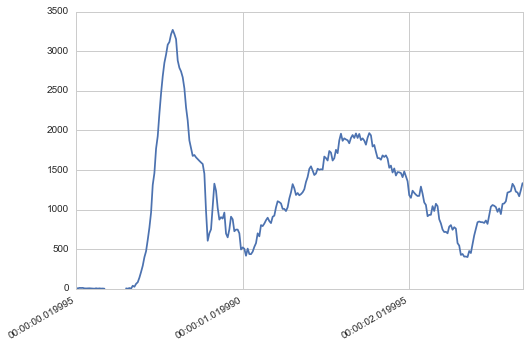

In [79]:
df.one.resample('10ms', how='sum').plot()

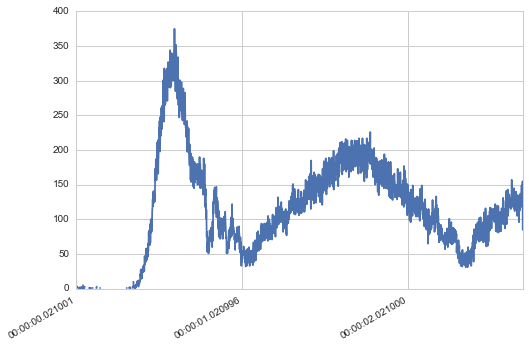

In [80]:
df.one.resample('1ms', how='sum').plot()

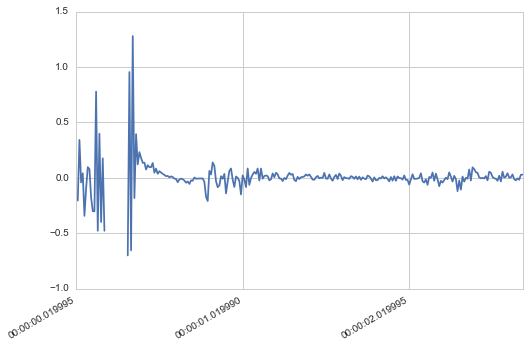

In [81]:
(df.one.resample('10ms', how='sum').apply(np.log10) - df.one.resample('10ms', how='sum').shift(1).apply(np.log10)).plot()

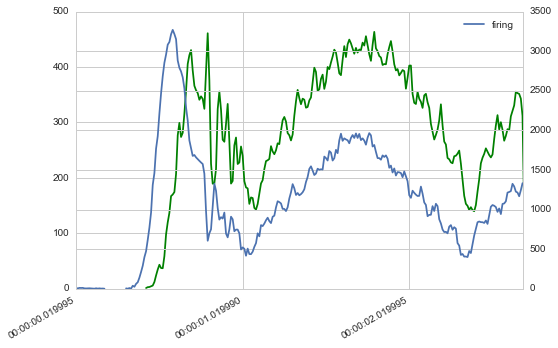

In [78]:
ax = missEnergy.energy.resample('10ms', how='sum').plot(color='g', label='missing energy')
df.one.resample('10ms', how='sum').plot(ax=ax.twinx(), label='firing')
plt.legend()